In [1]:
import pandas as pd
from datetime import datetime,timedelta
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByState.csv

In [3]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

In [4]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv", infer_datetime_format=True,index_col='dt', parse_dates=['dt'],date_parser=dateparse)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1855-05-01,25.544,1.171,Acre,Brazil
1855-06-01,24.228,1.103,Acre,Brazil
1855-07-01,24.371,1.044,Acre,Brazil
1855-08-01,25.427,1.073,Acre,Brazil
1855-09-01,25.675,1.014,Acre,Brazil


In [5]:
df.dtypes

AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [6]:
df.shape

(645675, 4)

In [7]:
df.isnull().mean()*100

AverageTemperature               3.972277
AverageTemperatureUncertainty    3.972277
State                            0.000000
Country                          0.000000
dtype: float64

In [8]:
#Droping all null values
df = df.dropna(how='any' ,axis=0)
df.shape

(620027, 4)

In [9]:
#rename col to understand better
df.rename(columns={'AverageTemperatureUncertainty': 'confidence_interval_temp'},inplace=True)

In [10]:
df.head()

,AverageTemperature,confidence_interval_temp,State,Country
dt,,,,
1855-05-01,25.544,1.171,Acre,Brazil
1855-06-01,24.228,1.103,Acre,Brazil
1855-07-01,24.371,1.044,Acre,Brazil
1855-08-01,25.427,1.073,Acre,Brazil
1855-09-01,25.675,1.014,Acre,Brazil


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620027 entries, 1855-05-01 to 2013-08-01
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AverageTemperature        620027 non-null  float64
 1   confidence_interval_temp  620027 non-null  float64
 2   State                     620027 non-null  object 
 3   Country                   620027 non-null  object 
dtypes: float64(2), object(2)
memory usage: 23.7+ MB


In [12]:
df.describe()

,AverageTemperature,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [13]:
#Now we use year as index
df['year']= df.index.year
df.head()

,AverageTemperature,confidence_interval_temp,State,Country,year
dt,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [14]:
df.tail()

,AverageTemperature,confidence_interval_temp,State,Country,year
dt,,,,,
2013-04-01,15.710,0.461,Zhejiang,China,2013
2013-05-01,21.634,0.578,Zhejiang,China,2013
2013-06-01,24.679,0.596,Zhejiang,China,2013
2013-07-01,29.272,1.340,Zhejiang,China,2013
2013-08-01,29.202,0.869,Zhejiang,China,2013


In [15]:
df.describe()

,AverageTemperature,confidence_interval_temp,year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [16]:
#Now we use latest data
latest_df = df.loc['1980':'2013']
latest_df.head()

,AverageTemperature,confidence_interval_temp,State,Country,year
dt,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [17]:
#Grouping available data based on average temperature
latest_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

,AverageTemperature
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


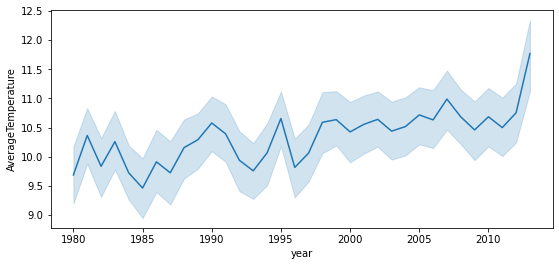

In [18]:
#Plotting graph between year and average temperature
plt.figure(figsize=(9,4))
sns.lineplot(x = "year" , y = "AverageTemperature",data=latest_df)
plt.show()

In [19]:
resample_df = latest_df['AverageTemperature'].resample('A').mean()
resample_df.head()

dt
1980-12-31     9.689856
1981-12-31    10.366578
1982-12-31     9.837958
1983-12-31    10.259516
1984-12-31     9.724950
Freq: A-DEC, Name: AverageTemperature, dtype: float64

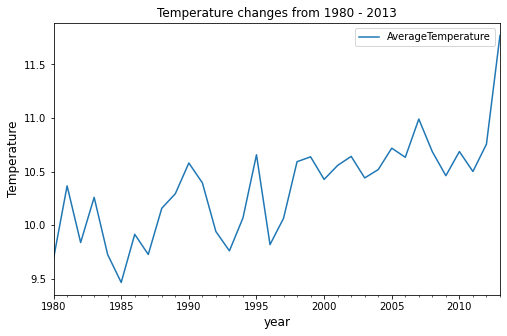

In [20]:
resample_df.plot(title='Temperature changes from 1980 - 2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.legend()

In [21]:
resample_df.head()

dt
1980-12-31     9.689856
1981-12-31    10.366578
1982-12-31     9.837958
1983-12-31    10.259516
1984-12-31     9.724950
Freq: A-DEC, Name: AverageTemperature, dtype: float64

In [22]:
df1 = pd.DataFrame(resample_df)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 1980-12-31 to 2013-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  34 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [24]:
#performing the log transformation using numpy
log_df = np.log(resample_df)

In [25]:
log_df.head()

dt
1980-12-31    2.271080
1981-12-31    2.338587
1982-12-31    2.286248
1983-12-31    2.328206
1984-12-31    2.274695
Freq: A-DEC, Name: AverageTemperature, dtype: float64

In [26]:
log_df.skew()

0.2820516610642656

#### 27 years for train dataset & 7yrs for test data

In [27]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox

In [28]:
train_size = int(len(log_df) * 0.80)
train, test = log_df[0:train_size], log_df[train_size:]

In [29]:
train_size1 = int(len(resample_df) * 0.80)
train1, test1 = resample_df[0:train_size1], resample_df[train_size1:]

<AxesSubplot:ylabel='Density'>

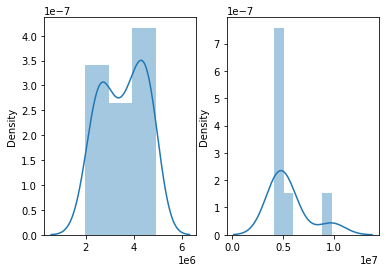

In [30]:
# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train1)

# use lambda value to transform test data
test_data = stats.boxcox(test1, fitted_lambda)

# (optional) plot train & test
fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

In [31]:
train1.shape

(27,)

In [32]:
test1.shape

(7,)

In [33]:
train.tail()

dt
2002-12-31    2.364781
2003-12-31    2.345699
2004-12-31    2.353155
2005-12-31    2.371975
2006-12-31    2.363991
Freq: A-DEC, Name: AverageTemperature, dtype: float64

In [34]:
test

dt
2007-12-31    2.396980
2008-12-31    2.368858
2009-12-31    2.347705
2010-12-31    2.368996
2011-12-31    2.351445
2012-12-31    2.375425
2013-12-31    2.465649
Freq: A-DEC, Name: AverageTemperature, dtype: float64

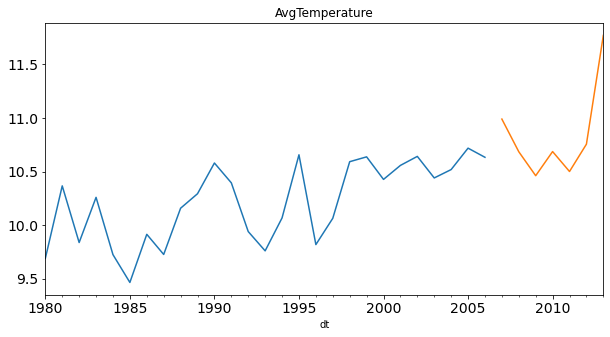

In [35]:
train1.plot(figsize=(10,5), title= 'AvgTemperature', fontsize=14)
test1.plot(figsize=(10,5), title= 'AvgTemperature', fontsize=14)
plt.show()

In [36]:
avgdf = latest_df['AverageTemperature'].mean()

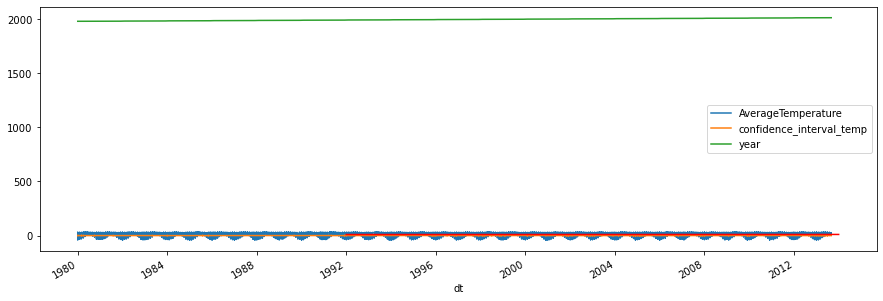

In [37]:
moving_avg =resample_df.rolling(12).mean()
latest_df.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

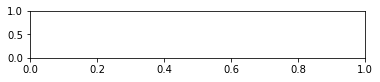

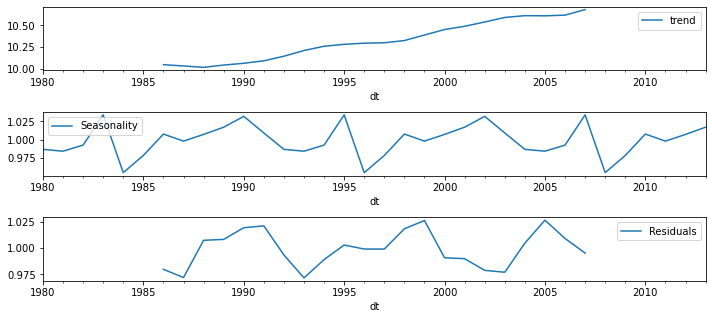

In [38]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(resample_df,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

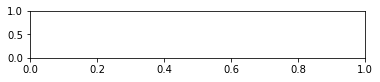

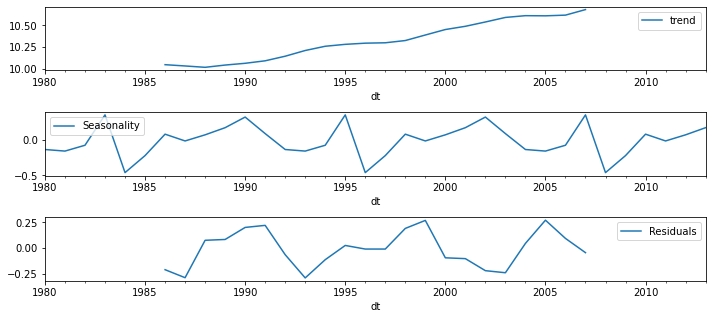

In [39]:
decomposition = sts.seasonal_decompose(resample_df,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [41]:
train1 = train1.astype('double')
ses = SimpleExpSmoothing(train1).fit()
ses1 = ses.forecast(7)
ses.summary()

Dep. Variable:,AverageTemperature,No. Observations:,27
Model:,SimpleExpSmoothing,SSE,2.764
Optimized:,True,AIC,-57.537
Trend:,None,BIC,-54.945
Seasonal:,None,AICC,-55.719
Seasonal Periods:,None,Date:,"Sun, 26 Sep 2021"
Box-Cox:,False,Time:,15:16:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2905007,alpha,True
initial_level,9.9462898,l.0,True


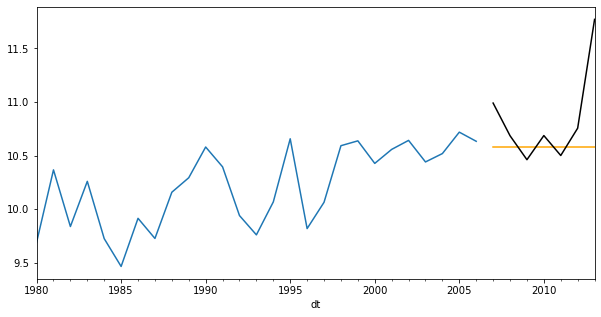

In [42]:
train1.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test1.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [43]:
hes = ExponentialSmoothing(train1, trend="add").fit()
hes.summary()

Dep. Variable:,AverageTemperature,No. Observations:,27
Model:,ExponentialSmoothing,SSE,2.048
Optimized:,True,AIC,-61.630
Trend:,Additive,BIC,-56.447
Seasonal:,None,AICC,-57.430
Seasonal Periods:,None,Date:,"Sun, 26 Sep 2021"
Box-Cox:,False,Time:,15:16:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,2.416e-09,beta,True


In [44]:
hes1 = hes.forecast(7)

<AxesSubplot:xlabel='dt'>

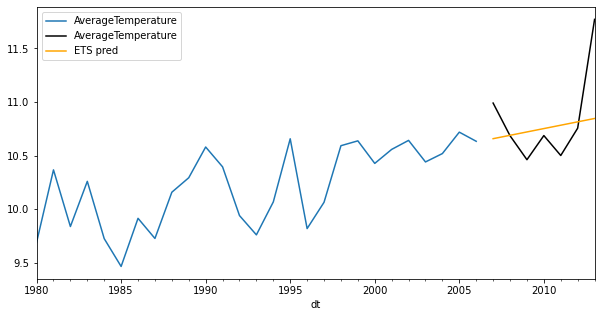

In [45]:
train1.plot(kind="line",figsize=(10,5),legend=True)
test1.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [46]:
hwes = ExponentialSmoothing(train1 , seasonal_periods=12 ,trend='add', seasonal="multiplicative").fit()
hwes.summary()

Dep. Variable:,AverageTemperature,No. Observations:,27
Model:,ExponentialSmoothing,SSE,0.896
Optimized:,True,AIC,-59.950
Trend:,Additive,BIC,-39.216
Seasonal:,Multiplicative,AICC,25.550
Seasonal Periods:,12,Date:,"Sun, 26 Sep 2021"
Box-Cox:,False,Time:,15:16:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,4.6611e-24,beta,True


In [47]:
hwes1 = hwes.forecast(7)

<AxesSubplot:xlabel='dt'>

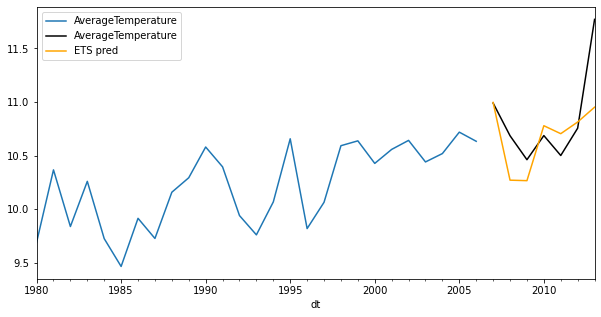

In [48]:
train1.plot(kind="line",figsize=(10,5),legend=True)
test1.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [49]:
train1

dt
1980-12-31     9.689856
1981-12-31    10.366578
1982-12-31     9.837958
1983-12-31    10.259516
1984-12-31     9.724950
1985-12-31     9.465436
1986-12-31     9.914519
1987-12-31     9.726528
1988-12-31    10.158058
1989-12-31    10.293226
1990-12-31    10.579912
1991-12-31    10.394824
1992-12-31     9.940195
1993-12-31     9.760204
1994-12-31    10.067471
1995-12-31    10.656668
1996-12-31     9.818723
1997-12-31    10.064026
1998-12-31    10.592179
1999-12-31    10.637408
2000-12-31    10.426971
2001-12-31    10.557589
2002-12-31    10.641713
2003-12-31    10.440567
2004-12-31    10.518699
2005-12-31    10.718543
2006-12-31    10.633299
Freq: A-DEC, Name: AverageTemperature, dtype: float64

In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(resample_df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

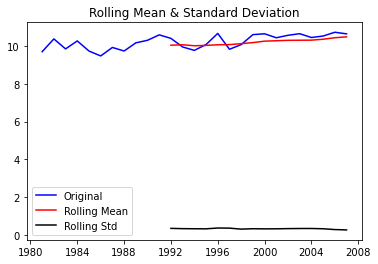

Results of Dickey-Fuller Test:
Test Statistic                 -0.728209
p-value                         0.839307
#Lags Used                      2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [51]:
test_stationarity(train1)

### series is not stationary as mean is increasing even though the std.
### pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(train1, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,5.615776,0.017799


In [53]:
acorr_ljungbox(train_data, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,5.902979,0.015115


### Using Ljung-Box Tests pvalue < 0.05 hence series is stationary for train data and also train_data which we taken boxcox transformation

In [54]:
diff1=train1.diff()
diff1=diff1.dropna()

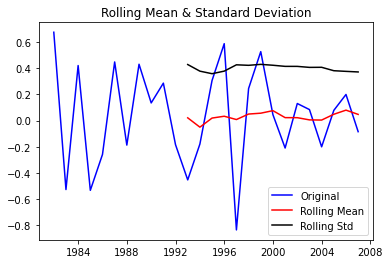

Results of Dickey-Fuller Test:
Test Statistic                 -0.728209
p-value                         0.839307
#Lags Used                      2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [55]:
test_stationarity(diff1)

In [56]:
acorr_ljungbox(diff1, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,3.27533,0.070329


In [57]:
diff2=diff1.diff(3)
diff2=diff2.dropna()

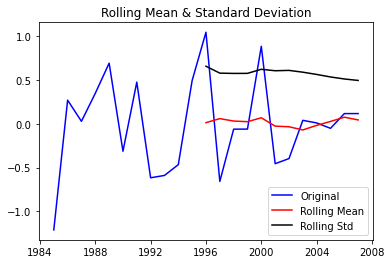

Results of Dickey-Fuller Test:
Test Statistic                 -0.728209
p-value                         0.839307
#Lags Used                      2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [58]:
test_stationarity(diff2)

In [59]:
acorr_ljungbox(diff2, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,0.335248,0.562585


In [60]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

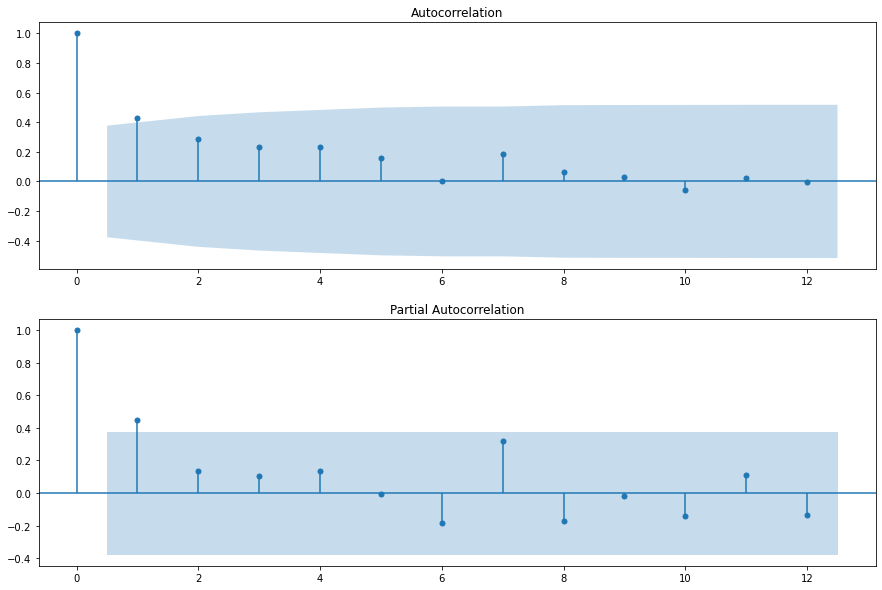

In [61]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(train1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(train1, ax=pyplot.gca(),lags=12)
pyplot.show()

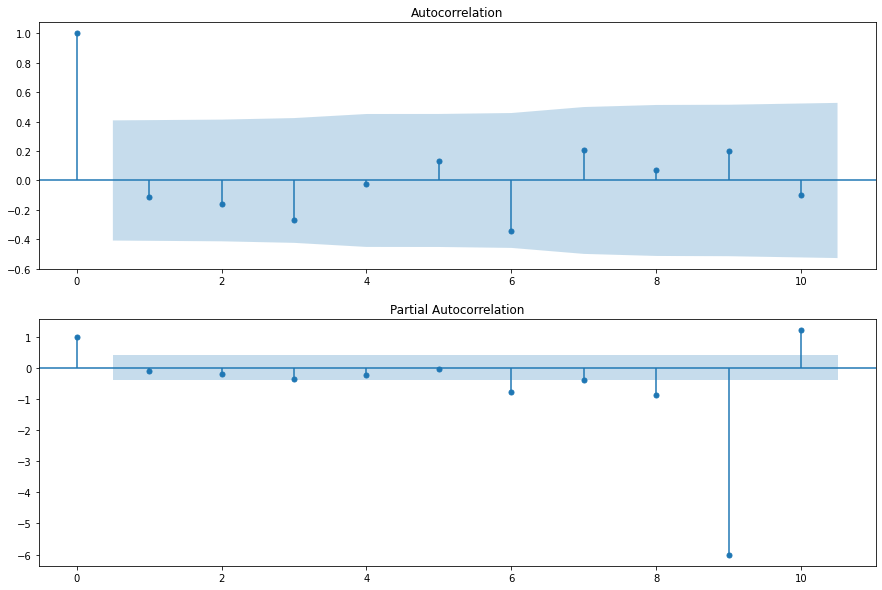

In [62]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=10)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=10)
pyplot.show()

## from ACF and PACF vlaues of p,q = (1,1)

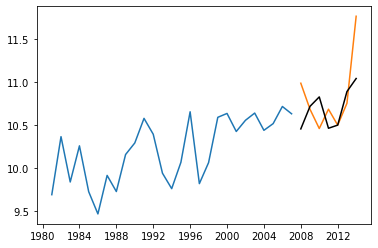

In [63]:
from pmdarima import auto_arima
model = auto_arima(train1,seasonal=True, m=7)
model_auto = model.fit(train1)

forecast = model.predict(n_periods=len(test1))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train1, label='Train')
plt.plot(test1, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [64]:
print(model_auto.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                   27
Model:             SARIMAX(1, 1, 3)x(0, 0, [1, 2], 7)   Log Likelihood                  -3.602
Date:                                Sun, 26 Sep 2021   AIC                             23.204
Time:                                        15:17:25   BIC                             33.269
Sample:                                             0   HQIC                            26.102
                                                 - 27                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0480      0.032      1.493      0.135      -0.015       0.111
ar.

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
print(mean_absolute_error(y_true=test1,y_pred=forecast))

0.2890159310083649


In [67]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model1 = ARIMA(train1, order=(3,1,1),freq='A')
model_fit=model1.fit(disp=True)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.AverageTemperature   No. Observations:                   26
Model:                   ARIMA(3, 1, 1)   Log Likelihood                  -4.808
Method:                         css-mle   S.D. of innovations              0.272
Date:                  Sun, 26 Sep 2021   AIC                             21.616
Time:                          15:17:26   BIC                             29.165
Sample:                      12-31-1981   HQIC                            23.790
                           - 12-31-2006                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0321      0.006      5.134      0.000       0.020       0.044
ar.L1.D.AverageTemperature     0.1264      0.197      0.642      0.

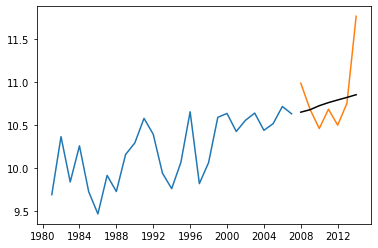

In [69]:
forecast1 = model_fit.forecast(steps=7)[0]

forecast1 = pd.DataFrame(forecast1,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train1, label='Train')
plt.plot(test1, label='Test')
plt.plot(forecast1, label='Prediction', color='black')
plt.show()

In [70]:
print(mean_absolute_error(y_true=test1,y_pred=forecast1))

0.28042497686505563


In [71]:
print("Predicted Values")
print("*"*50)
print(forecast1)
print("-"*50)
print("Actual Values")
print("*"*50)
print(test1)

Predicted Values
**************************************************
            Prediction
dt                    
2007-12-31   10.652240
2008-12-31   10.680908
2009-12-31   10.727731
2010-12-31   10.763698
2011-12-31   10.794552
2012-12-31   10.824297
2013-12-31   10.855870
--------------------------------------------------
Actual Values
**************************************************
dt
2007-12-31    10.989940
2008-12-31    10.685179
2009-12-31    10.461537
2010-12-31    10.686661
2011-12-31    10.500732
2012-12-31    10.755588
2013-12-31    11.771115
Freq: A-DEC, Name: AverageTemperature, dtype: float64


In [72]:
import statsmodels.api as sm

In [161]:
model_sari = sm.tsa.SARIMAX(train1, order=(3,1,1), seasonal_order=(0,0,2,7))

In [162]:
model_fit_sari=model_sari.fit(disp=True)
print(model_fit_sari.summary())

                                     SARIMAX Results                                     
Dep. Variable:                AverageTemperature   No. Observations:                   27
Model:             SARIMAX(3, 1, 1)x(0, 0, 1, 7)   Log Likelihood                  -6.900
Date:                           Sun, 26 Sep 2021   AIC                             25.801
Time:                                   15:27:48   BIC                             33.349
Sample:                               12-31-1980   HQIC                            27.974
                                    - 12-31-2006                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1775      0.465      0.381      0.703      -0.735       1.090
ar.L2         -0.1156      0.272     -0.424

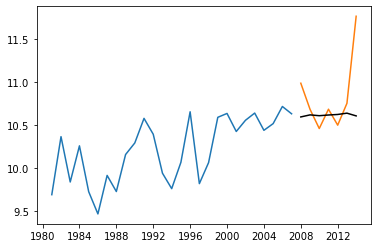

In [163]:
forecast_sari = model_fit_sari.forecast(steps=7)
#print(forecast)

#plot the predictions for validation set
plt.plot(train1, label='Train')
plt.plot(test1, label='Test')
plt.plot(forecast_sari, label='Prediction', color='black')
plt.show()

In [164]:
print(mean_absolute_error(y_true=test1,y_pred=forecast_sari))

0.2967169317915688


In [165]:
print("Predicted Values")
print("*"*50)
print(forecast_sari)
print("-"*50)
print("Actual Values")
print("*"*50)
print(test1)

Predicted Values
**************************************************
2007-12-31    10.596653
2008-12-31    10.620537
2009-12-31    10.611086
2010-12-31    10.619187
2011-12-31    10.625417
2012-12-31    10.640661
2013-12-31    10.608662
Freq: A-DEC, Name: predicted_mean, dtype: float64
--------------------------------------------------
Actual Values
**************************************************
dt
2007-12-31    10.989940
2008-12-31    10.685179
2009-12-31    10.461537
2010-12-31    10.686661
2011-12-31    10.500732
2012-12-31    10.755588
2013-12-31    11.771115
Freq: A-DEC, Name: AverageTemperature, dtype: float64


In [78]:
converted_results = [(np.exp(x)) for x in [i for i in forecast_sari]]

In [79]:
converted_results

[60056.452583463986,
 31548.85213145056,
 27760.724683339573,
 45247.97372909679,
 40890.273101799445,
 52056.01865781109,
 58396.88612946562]

### SARIMAX with transformed data

In [80]:
model_sari1 = sm.tsa.SARIMAX(train_data, order=(3,1,1), seasonal_order=(3,1,1,12))

In [81]:
model_fit_sari1=model_sari1.fit(disp=True)
print(model_fit_sari1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   27
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -208.574
Date:                            Sun, 26 Sep 2021   AIC                            435.147
Time:                                    15:17:33   BIC                            440.899
Sample:                                         0   HQIC                           434.615
                                             - 27                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3341      8.744      0.038      0.970     -16.804      17.472
ar.L2         -0.4621      0.631   

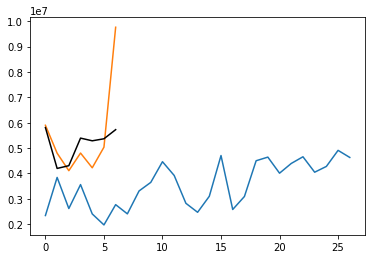

986774.3046448353


In [82]:
forecast_sari1 = model_fit_sari1.forecast(steps=7)
#print(forecast)

#plot the predictions for validation set
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast_sari1, label='Prediction', color='black')
plt.show()
print(mean_absolute_error(y_true=test_data,y_pred=forecast_sari1))

In [83]:
forecast_sari1

array([5808930.0106417 , 4198205.86776136, 4307226.09483683,
       5393333.68400491, 5287254.20596847, 5366752.83999621,
       5726370.06491986])

In [84]:
print(inv_boxcox(forecast_sari1, fitted_lambda))

[10.96690196 10.49199132 10.52872398 10.85648024 10.82712048 10.84917057
 10.94552189]


In [85]:
print(mean_absolute_error(y_true=test_data,y_pred=forecast_sari1))

986774.3046448353


In [86]:
import warnings
from pandas import Series

In [87]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [88]:
warnings.filterwarnings("ignore")

In [89]:
p_values = [0, 1, 2, 3]
d_values = range(0, 3) #this is the range for the values
q_values = range(0, 3) #this is the range for the values

In [90]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [91]:
evaluate_models(resample_df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.490
ARIMA(0, 0, 1) MSE=0.353
ARIMA(0, 0, 2) MSE=0.344
ARIMA(0, 1, 0) MSE=0.200
ARIMA(0, 1, 1) MSE=0.175
ARIMA(0, 1, 2) MSE=0.173
ARIMA(0, 2, 0) MSE=0.267
ARIMA(0, 2, 1) MSE=0.211
ARIMA(0, 2, 2) MSE=0.195
ARIMA(1, 0, 0) MSE=0.291
ARIMA(1, 0, 1) MSE=0.493
ARIMA(1, 1, 0) MSE=0.214
ARIMA(1, 1, 1) MSE=0.175
ARIMA(1, 2, 0) MSE=0.249
ARIMA(2, 0, 0) MSE=0.282
ARIMA(2, 0, 1) MSE=0.303
ARIMA(2, 1, 0) MSE=0.203
ARIMA(2, 1, 1) MSE=0.167
ARIMA(2, 2, 0) MSE=0.197
ARIMA(2, 2, 1) MSE=0.212
ARIMA(2, 2, 2) MSE=0.257
ARIMA(3, 0, 0) MSE=0.263
ARIMA(3, 0, 1) MSE=0.268
ARIMA(3, 1, 0) MSE=0.219
ARIMA(3, 1, 1) MSE=0.165
ARIMA(3, 1, 2) MSE=0.184
ARIMA(3, 2, 0) MSE=0.252
Best ARIMA(3, 1, 1) MSE=0.165


## ARIMA model with values p=3,d=1 and q=1 gives AIC = 21.616 and MSE= 0.28
## SARIMAX model with values p=3,d=1, q=1 and s=12 gives AIC = 28 and MSE= 0.23
## shown forecast values for 7 yrs

In [92]:
train

dt
1980-12-31    2.271080
1981-12-31    2.338587
1982-12-31    2.286248
1983-12-31    2.328206
1984-12-31    2.274695
1985-12-31    2.247647
1986-12-31    2.294000
1987-12-31    2.274857
1988-12-31    2.318267
1989-12-31    2.331486
1990-12-31    2.358957
1991-12-31    2.341308
1992-12-31    2.296587
1993-12-31    2.278313
1994-12-31    2.309309
1995-12-31    2.366186
1996-12-31    2.284291
1997-12-31    2.308967
1998-12-31    2.360116
1999-12-31    2.364377
2000-12-31    2.344396
2001-12-31    2.356845
2002-12-31    2.364781
2003-12-31    2.345699
2004-12-31    2.353155
2005-12-31    2.371975
2006-12-31    2.363991
Freq: A-DEC, Name: AverageTemperature, dtype: float64

In [93]:
train_sizedf = int(len(df1) * 0.80)
traindf, testdf = df1[0:train_size], df1[train_size:]

In [94]:
traindf

,AverageTemperature
dt,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950
1985-12-31,9.465436
1986-12-31,9.914519
1987-12-31,9.726528
1988-12-31,10.158058


In [95]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [96]:
traindf['ds'] = traindf.index
traindf['y'] = traindf['AverageTemperature']

In [97]:
traindf

,AverageTemperature,ds,y
dt,,,
1980-12-31,9.689856,1980-12-31,9.689856
1981-12-31,10.366578,1981-12-31,10.366578
1982-12-31,9.837958,1982-12-31,9.837958
1983-12-31,10.259516,1983-12-31,10.259516
1984-12-31,9.724950,1984-12-31,9.724950
1985-12-31,9.465436,1985-12-31,9.465436
1986-12-31,9.914519,1986-12-31,9.914519
1987-12-31,9.726528,1987-12-31,9.726528
1988-12-31,10.158058,1988-12-31,10.158058


In [98]:
# Apply Box-Cox Transform to value column and assign to new column y
traindf['y'], lam = stats.boxcox(traindf['AverageTemperature'])

In [99]:
acorr_ljungbox(traindf['y'], lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,5.902979,0.015115


In [100]:
m = fbprophet.Prophet()

In [101]:
m.fit(traindf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [102]:
future = m.make_future_dataframe(freq='A', periods=7)

In [103]:
forecastFB = m.predict(future)

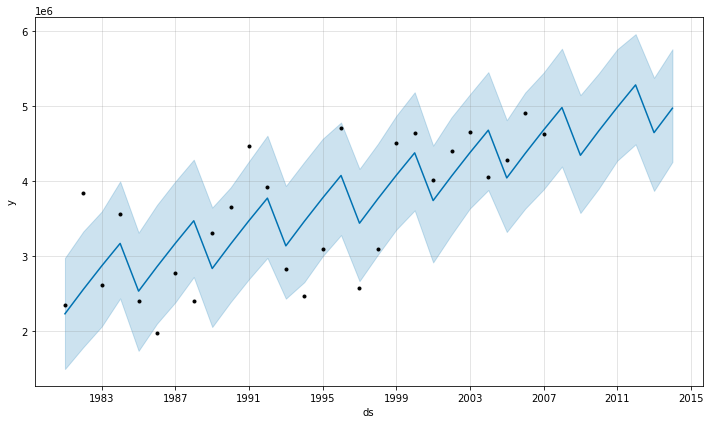

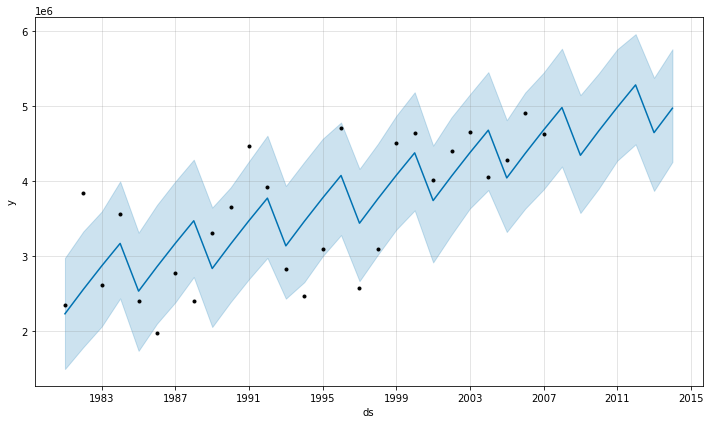

In [104]:
m.plot(forecastFB)

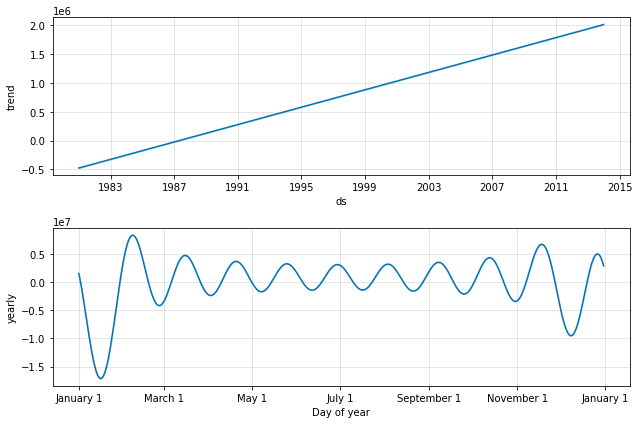

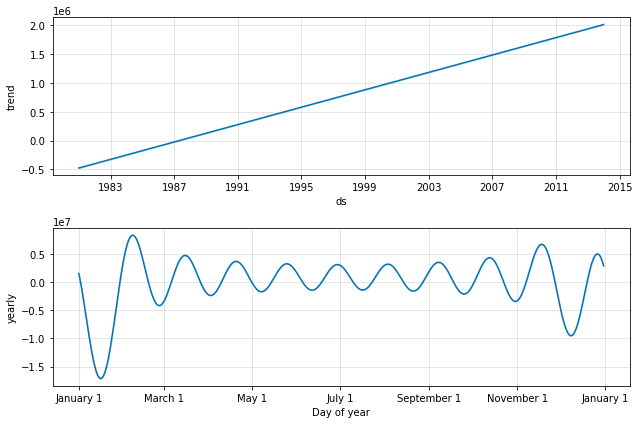

In [105]:
m.plot_components(forecastFB)

In [106]:
# Apply inverse Box-Cox transform to specific forecast columns
forecastFB[['yhat','yhat_upper','yhat_lower']] = forecastFB[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))

In [107]:
forecastFB

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-31,-4.761826e+05,9.114776,10.010841,-4.761826e+05,-4.761826e+05,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,0.0,0.0,0.0,9.625876
1,1981-12-31,-4.008348e+05,9.339402,10.165395,-4.008348e+05,-4.008348e+05,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,0.0,0.0,0.0,9.806182
2,1982-12-31,-3.254870e+05,9.523440,10.272040,-3.254870e+05,-3.254870e+05,3.194968e+06,3.194968e+06,3.194968e+06,3.194968e+06,3.194968e+06,3.194968e+06,0.0,0.0,0.0,9.961599
3,1983-12-31,-2.501392e+05,9.741845,10.420870,-2.501392e+05,-2.501392e+05,3.419134e+06,3.419134e+06,3.419134e+06,3.419134e+06,3.419134e+06,3.419134e+06,0.0,0.0,0.0,10.097342
4,1984-12-31,-1.745849e+05,9.303400,10.158112,-1.745849e+05,-1.745849e+05,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,0.0,0.0,0.0,9.793676
5,1985-12-31,-9.923708e+04,9.546789,10.305605,-9.923708e+04,-9.923708e+04,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,0.0,0.0,0.0,9.956377
6,1986-12-31,-2.388926e+04,9.713534,10.421089,-2.388926e+04,-2.388926e+04,3.194968e+06,3.194968e+06,3.194968e+06,3.194968e+06,3.194968e+06,3.194968e+06,0.0,0.0,0.0,10.098247
7,1987-12-31,5.145856e+04,9.889956,10.520894,5.145856e+04,5.145856e+04,3.419134e+06,3.419134e+06,3.419134e+06,3.419134e+06,3.419134e+06,3.419134e+06,0.0,0.0,0.0,10.223260
8,1988-12-31,1.270128e+05,9.518683,10.292201,1.270128e+05,1.270128e+05,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,2.707632e+06,0.0,0.0,0.0,9.945025
9,1989-12-31,2.023606e+05,9.715072,10.392271,2.023606e+05,2.023606e+05,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,2.957704e+06,0.0,0.0,0.0,10.093458


In [108]:
testdf

,AverageTemperature
dt,
2007-12-31,10.989940
2008-12-31,10.685179
2009-12-31,10.461537
2010-12-31,10.686661
2011-12-31,10.500732
2012-12-31,10.755588
2013-12-31,11.771115


In [109]:
testdf

,AverageTemperature
dt,
2007-12-31,10.989940
2008-12-31,10.685179
2009-12-31,10.461537
2010-12-31,10.686661
2011-12-31,10.500732
2012-12-31,10.755588
2013-12-31,11.771115


In [110]:
y_pred = forecastFB['yhat'].values

In [111]:
y_pred[27:34]

array([10.73869663, 10.54048118, 10.64482751, 10.73930913, 10.82514425,
       10.63740565, 10.7360686 ])

In [112]:
print(mean_absolute_error(y_true=testdf,y_pred=y_pred[27:34]))

0.3013600429229807


In [113]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 45 forecasts with cutoffs between 1984-01-06 00:00:00 and 2005-12-31 00:00:00


  0%|          | 0/45 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbproph

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1984-12-31,3.508604e+06,2.826466e+06,4.249538e+06,2.405518e+06,1984-01-06 00:00:00
1,1984-12-31,3.508604e+06,2.812159e+06,4.242148e+06,2.405518e+06,1984-07-06 12:00:00
2,1985-12-31,2.658018e+06,2.020608e+06,3.323250e+06,1.972606e+06,1985-01-05 00:00:00
3,1985-12-31,2.658018e+06,1.995543e+06,3.280955e+06,1.972606e+06,1985-07-06 12:00:00
4,1986-12-31,2.460765e+06,1.833896e+06,3.105076e+06,2.771477e+06,1986-01-05 00:00:00


In [114]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,177 days 12:00:00,4.896603e+11,6.997573e+05,6.295378e+05,0.273023,0.260708,0.50
1,178 days 12:00:00,1.654856e+12,1.286412e+06,1.138419e+06,0.306314,0.300883,0.25
2,179 days 12:00:00,7.460217e+11,8.637255e+05,8.090935e+05,0.256790,0.249442,0.50
3,180 days 12:00:00,3.662957e+11,6.052237e+05,5.574773e+05,0.154271,0.151831,0.75
4,181 days 12:00:00,3.460984e+11,5.883013e+05,5.704415e+05,0.135857,0.146520,1.00


### Using Prophet procedure we have MSE = 0.3

# Better model amog all four above is model3 SARIMAX with p,d,q = (3,1,1) we get MSE = 0.231 and AIC = 28.684

In [115]:
import pickle
with open('modelSari.pckl', 'wb') as fout:
    pickle.dump(model_sari, fout)
with open('modelSari.pckl', 'rb') as fin:
    m2 = pickle.load(fin)

In [116]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin

ModuleNotFoundError: No module named 'flask_cors'

In [ ]:
!pip install flask-cors
